In [13]:
import pandas as pd

diabetes = pd.read_csv('diabetes_012_health_indicators.csv')


Dataset

In [14]:
import numpy as np

diabetes['HighBP'] = diabetes['HighBP'].replace(to_replace=np.NaN, value=0)
diabetes['HighChol'] = diabetes['HighChol'].replace(to_replace=np.NaN, value=0)
diabetes['CholCheck'] = diabetes['CholCheck'].replace(to_replace=np.NaN, value=0)
diabetes['Smoker'] = diabetes['Smoker'].replace(to_replace=np.NaN, value=0)
diabetes['Stroke'] = diabetes['Stroke'].replace(to_replace=np.NaN, value=0)
diabetes['HeartDiseaseorAttack'] = diabetes['HeartDiseaseorAttack'].replace(to_replace=np.NaN, value=0)
diabetes['PhysActivity'] = diabetes['PhysActivity'].replace(to_replace=np.NaN, value=0)
diabetes['Fruits'] = diabetes['Fruits'].replace(to_replace=np.NaN, value=0)
diabetes['Veggies'] = diabetes['Veggies'].replace(to_replace=np.NaN, value=0)
diabetes['HvyAlcoholConsump'] = diabetes['HvyAlcoholConsump'].replace(to_replace=np.NaN, value=0)
diabetes['AnyHealthcare'] = diabetes['AnyHealthcare'].replace(to_replace=np.NaN, value=0)
diabetes['GenHlth'] = diabetes['GenHlth'].replace(to_replace=np.NaN, value=0)
diabetes['MentHlth'] = diabetes['MentHlth'].replace(to_replace=np.NaN, value=0)
diabetes['PhysHlth'] = diabetes['PhysHlth'].replace(to_replace=np.NaN, value=0)
diabetes['DiffWalk'] = diabetes['DiffWalk'].replace(to_replace=np.NaN, value=0)
diabetes['Sex'] = diabetes['Sex'].replace(to_replace=np.NaN, value=0)
diabetes['Age'] = diabetes['Age'].replace(to_replace=0, value=diabetes['Age'].mean())


Reomve Outliers with Interquartile range (IQR)

old shape: (253680, 19)
new shape:  (253680, 19)


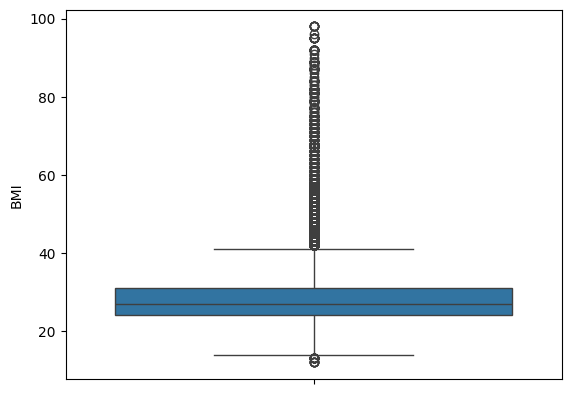

24.0 31.0
new shape:  (243833, 19)


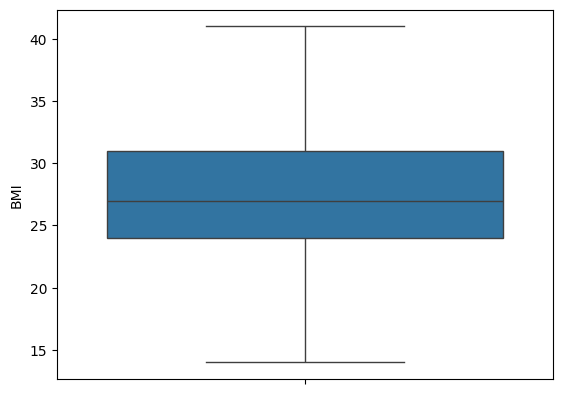

,index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
0,0,1,1,1,40,1,0,0,0,0,1,0,1,5,18,15,1,0,9,0
1,1,0,0,0,25,1,0,0,1,0,0,0,0,3,0,0,0,0,7,0
2,2,1,1,1,28,0,0,0,0,1,0,0,1,5,30,30,1,0,9,0
3,3,1,0,1,27,0,0,0,1,1,1,0,1,2,0,0,0,0,11,0
4,4,1,1,1,24,0,0,0,1,1,1,0,1,2,3,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243828,253674,0,0,1,27,0,0,0,0,0,1,0,1,1,0,0,0,0,3,0
243829,253676,1,1,1,18,0,0,0,0,0,0,0,1,4,0,0,1,0,11,2
243830,253677,0,0,1,28,0,0,0,1,1,0,0,1,1,0,0,0,0,2,0
243831,253678,1,0,1,23,0,0,0,0,1,1,0,1,3,0,0,0,1,7,0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def remove_outlires(column):
    print(f"old shape: {diabetes.shape}")
    print(f"new shape: ", diabetes.shape)
    sns.boxplot(diabetes[column])
    plt.show()

    Q1 = diabetes[column].quantile(0.25)
    Q3 = diabetes[column].quantile(0.75)
    print(Q1, Q3)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(diabetes[column] >= upper)[0]
    lower_array = np.where(diabetes[column] <= lower)[0]
    
    diabetes.drop(index=upper_array, inplace=True)
    diabetes.drop(index=lower_array, inplace=True)

    print(f"new shape: ", diabetes.shape)
    sns.boxplot(diabetes[column])
    plt.show()

remove_outlires('BMI')
diabetes.reset_index()

Dataset

No Diabetes:  207514
Type1:  31979
Type2:  4340


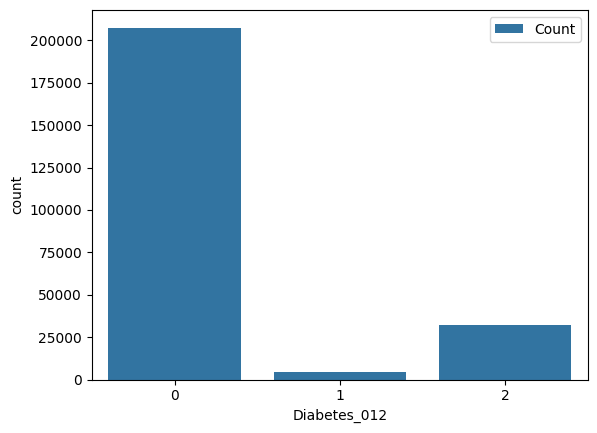

In [16]:
import seaborn as sns
sns.countplot(data= diabetes, x='Diabetes_012', label='Count')

NDB, Type1, Type2 = diabetes['Diabetes_012'].value_counts()
print("No Diabetes: ", NDB)
print("Type1: ",Type1)
print("Type2: ", Type2)

OutLiers

In [2]:
import matplotlib.pyplot as plt
# print(X.head())


# for col in diabetes.columns:
#     print(col)
#     sns.boxplot(diabetes[col])
#     plt.title(col)
#     plt.show()

10-fold Cross Validation

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

X = diabetes.drop(['Diabetes_012'], axis=1)
print(X.shape)
y = diabetes['Diabetes_012']
print(y.shape)

x_trains = []
y_trains = []
x_tests = []
y_tests = []

for i, (train_index, test_index) in enumerate(kf.split(diabetes)):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    print(i, x_test.shape, y_test.shape)
    # print(i, x_test.shape)

    x_trains.append(x_train)
    y_trains.append(y_train)
    x_tests.append(x_test)
    y_tests.append(y_test)
    pass

(243833, 18)
(243833,)
0 (24384, 18) (24384,)
1 (24384, 18) (24384,)
2 (24384, 18) (24384,)
3 (24383, 18) (24383,)
4 (24383, 18) (24383,)
5 (24383, 18) (24383,)
6 (24383, 18) (24383,)
7 (24383, 18) (24383,)
8 (24383, 18) (24383,)
9 (24383, 18) (24383,)


MNB

5
Accuracy: 0.7765246278144609
Precision 0.7904683891882761
Recall:  0.7765246278144609
F1 Score:  0.7832904967847103
[[18181   469  2418]
 [  321    11    92]
 [ 2085    64   742]]


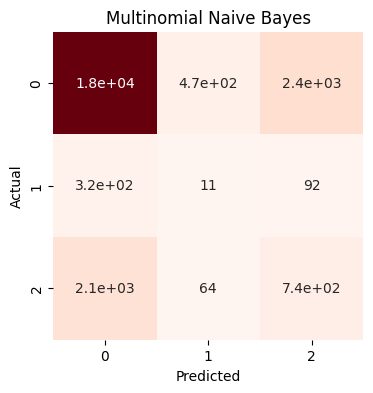

In [18]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

for i in range(10):
    models.append(MultinomialNB())
    models[i] = models[i].fit(x_trains[i], y_trains[i])
    y_pred = models[i].predict(x_tests[i])
    
    cm.append(confusion_matrix(y_tests[i], y_pred)) 
 

    Accuracy.append(accuracy_score(y_tests[i], y_pred))
    Precision.append(precision_score(y_tests[i], y_pred, average='weighted'))
    Recall.append(recall_score(y_tests[i], y_pred, average='weighted'))
    F1_Score.append(f1_score(y_tests[i], y_pred, pos_label=1, average='weighted'))

    if(Accuracy[i] > minAcc):
        minAcc = Accuracy[i]
        index = i
        pass
    
    # print(i)
    # print("Accuracy:" , Accuracy[i])
    # print("Precision", Precision[i])
    # print("Recall: ", Recall[i])
    # print("F1 Score: ", F1_Score[i])

    pass

print(index)
print("Accuracy:" , Accuracy[index])
print("Precision", Precision[index])
print("Recall: ", Recall[index])
print("F1 Score: ", F1_Score[index])

print(cm[index])
plt.figure(figsize=(4,4))
sns.heatmap(cm[index], annot=True, cbar=False, cmap='Reds')
plt.title("Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# print(cm[5])
    

Gaussian NB

In [ ]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

for i in range(10):
    models.append(GaussianNB())
    models[i] = models[i].fit(x_trains[i], y_trains[i])
    y_pred = models[i].predict(x_tests[i])
    
    cm.append(confusion_matrix(y_tests[i], y_pred)) 
 

    Accuracy.append(accuracy_score(y_tests[i], y_pred))
    Precision.append(precision_score(y_tests[i], y_pred, average='weighted'))
    Recall.append(recall_score(y_tests[i], y_pred, average='weighted'))
    F1_Score.append(f1_score(y_tests[i], y_pred, pos_label=1, average='weighted'))

    if(Accuracy[i] > minAcc):
        minAcc = Accuracy[i]
        index = i
        pass
    
    # print(i)
    # print("Accuracy:" , Accuracy[i])
    # print("Precision", Precision[i])
    # print("Recall: ", Recall[i])
    # print("F1 Score: ", F1_Score[i])

    pass

print(index)
print("Accuracy:" , Accuracy[index])
print("Precision", Precision[index])
print("Recall: ", Recall[index])
print("F1 Score: ", F1_Score[index])

print(cm[index])
plt.figure(figsize=(4,4))
sns.heatmap(cm[index], annot=True, cbar=False, cmap='Greens')
plt.title("Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# print(cm[5])
    

Decision Tree Classifier

c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\.cond

5
Accuracy: 0.864044621252512
Precision 0.746573107515397
Recall:  0.864044621252512
F1 Score:  0.8010249314887649
[[21068     0     0]
 [  424     0     0]
 [ 2891     0     0]]


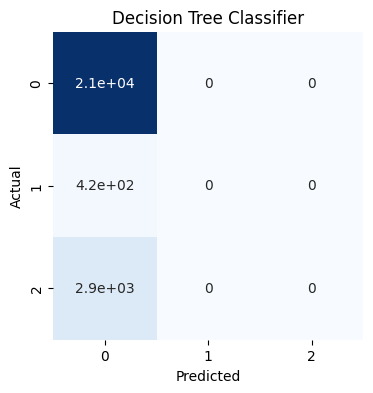

In [7]:
from sklearn.tree import DecisionTreeClassifier

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

for i in range(10):
    models.append(DecisionTreeClassifier(max_depth=3)) 
    models[i] = models[i].fit(x_trains[i], y_trains[i])
    y_pred = models[i].predict(x_tests[i])

    cm.append(confusion_matrix(y_tests[i], y_pred)) 
    Accuracy.append(accuracy_score(y_tests[i], y_pred))
    Precision.append(precision_score(y_tests[i], y_pred, average='weighted'))
    Recall.append(recall_score(y_tests[i], y_pred, average='weighted'))
    F1_Score.append(f1_score(y_tests[i], y_pred, pos_label=1, average='weighted'))

    if(Accuracy[i] > minAcc):
        minAcc = Accuracy[i]
        index = i
        pass
    
    pass


print(index)
print("Accuracy:" , Accuracy[index])
print("Precision", Precision[index])
print("Recall: ", Recall[index])
print("F1 Score: ", F1_Score[index])

print(cm[index])
plt.figure(figsize=(4,4))
sns.heatmap(cm[index], annot=True, cbar=False, cmap='Blues')
plt.title("Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# cm[5]

Visualize tree

In [8]:
from sklearn import tree
feature_names = list[X.columns]
print(tree.export_text(models[index], feature_names=X.columns))

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- class: 0
|   |   |--- Age >  9.50
|   |   |   |--- class: 0
|   |--- GenHlth >  2.50
|   |   |--- HighChol <= 0.50
|   |   |   |--- class: 0
|   |   |--- HighChol >  0.50
|   |   |   |--- class: 0
|--- HighBP >  0.50
|   |--- GenHlth <= 2.50
|   |   |--- BMI <= 29.50
|   |   |   |--- class: 0
|   |   |--- BMI >  29.50
|   |   |   |--- class: 0
|   |--- GenHlth >  2.50
|   |   |--- BMI <= 30.50
|   |   |   |--- class: 0
|   |   |--- BMI >  30.50
|   |   |   |--- class: 0



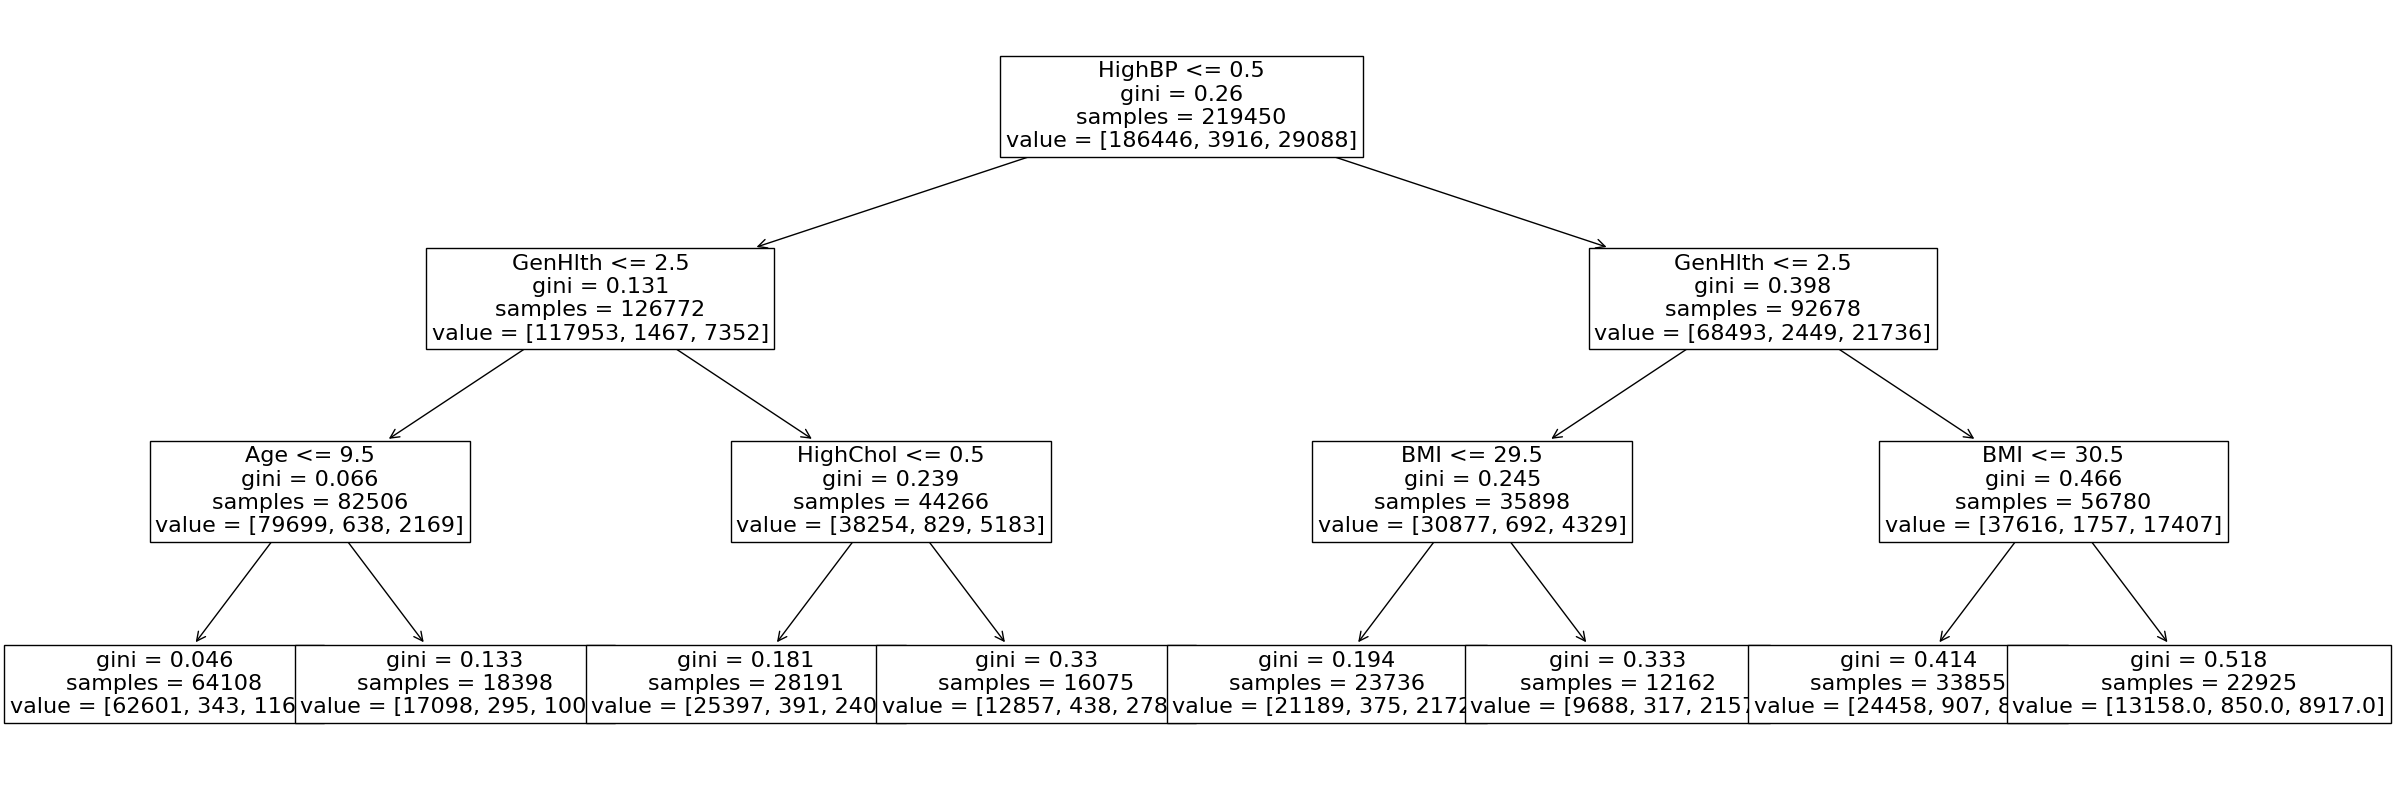

In [9]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(models[index], fontsize=16, feature_names=X.columns)
plt.show()

In [10]:
x_trains[0].head()
for i in range(10):
    x_trains[i] = x_trains[i].drop(['CholCheck'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['CholCheck'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['Fruits'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['Fruits'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['Veggies'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['Veggies'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['AnyHealthcare'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['AnyHealthcare'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['AnyHealthcare'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['AnyHealthcare'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['GenHlth'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['GenHlth'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['MentHlth'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['MentHlth'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['PhysHlth'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['PhysHlth'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['DiffWalk'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['DiffWalk'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['PhysActivity'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['PhysActivity'], axis=1, errors='ignore')

    # x_trains[i] = x_trains[i].drop(['Smoker'], axis=1, errors='ignore')
    # x_tests[i] = x_tests[i].drop(['Smoker'], axis=1, errors='ignore')
    
    x_trains[i] = x_trains[i].drop(['HeartDiseaseorAttack'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['HeartDiseaseorAttack'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['HvyAlcoholConsump'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['HvyAlcoholConsump'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['Stroke'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['Stroke'], axis=1, errors='ignore')
    
    x_trains[i] = x_trains[i].drop(['Smoker'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['Smoker'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['Sex'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['Sex'], axis=1, errors='ignore')

    x_trains[i] = x_trains[i].drop(['HighChol'], axis=1, errors='ignore')
    x_tests[i] = x_tests[i].drop(['HighChol'], axis=1, errors='ignore')

    pass

x_tests[0].head()

,HighBP,BMI,Age
0,1,40,9
1,0,25,7
2,1,28,9
3,1,27,11
4,1,24,11


Logistic Regression

0


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


8


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


9


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5
Accuracy: 0.862773243653365
Precision 0.8014946819611182
Recall:  0.862773243653365
F1 Score:  0.8099912176511509
[[20905     0   163]
 [  414     0    10]
 [ 2759     0   132]]


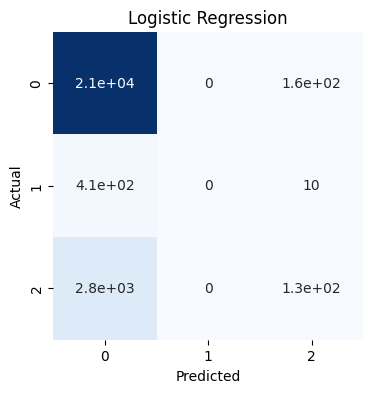

In [12]:
from sklearn.linear_model import LogisticRegression

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

for i in range(10):
    print(i)
    models.append(LogisticRegression(solver='sag', max_iter=100))
    models[i] = models[i].fit(x_trains[i], y_trains[i])
    y_pred = models[i].predict(x_tests[i])

    cm.append(confusion_matrix(y_tests[i], y_pred)) 
    Accuracy.append(accuracy_score(y_tests[i], y_pred))
    Precision.append(precision_score(y_tests[i], y_pred, average='weighted'))
    Recall.append(recall_score(y_tests[i], y_pred, average='weighted'))
    F1_Score.append(f1_score(y_tests[i], y_pred, pos_label=1, average='weighted'))

    if(Accuracy[i] > minAcc):
        minAcc = Accuracy[i]
        index = i
        pass

    pass

print(index)
print("Accuracy:" , Accuracy[index])
print("Precision", Precision[index])
print("Recall: ", Recall[index])
print("F1 Score: ", F1_Score[index])

print(cm[index])
plt.figure(figsize=(4,4))
sns.heatmap(cm[index], annot=True, cbar=False, cmap='Blues')
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



<Axes: xlabel='BMI', ylabel='Diabetes_012'>

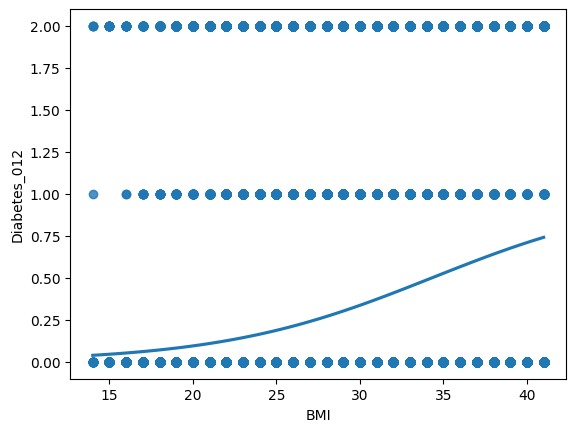

In [13]:
x1 = diabetes['BMI']
y1 = diabetes['Diabetes_012']
sns.regplot(x=x1, y=y1, logistic=True, ci=None)



Support Vector Machine

In [11]:
from sklearn import svm

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

for i in range(10):
    print(i)
    models.append(svm.SVC(kernel='linear', verbose=True))
    models[i] = models[i].fit(x_trains[i], y_trains[i])
    y_pred = models[i].predict(x_tests[i])

    cm.append(confusion_matrix(y_tests[i], y_pred)) 
    Accuracy.append(accuracy_score(y_tests[i], y_pred))
    Precision.append(precision_score(y_tests[i], y_pred, average='weighted'))
    Recall.append(recall_score(y_tests[i], y_pred, average='weighted'))
    F1_Score.append(f1_score(y_tests[i], y_pred, pos_label=1, average='weighted'))

    if(Accuracy[i] > minAcc):
        minAcc = Accuracy[i]
        index = i
        pass

    pass

print(index)
print("Accuracy:" , Accuracy[index])
print("Precision", Precision[index])
print("Recall: ", Recall[index])
print("F1 Score: ", F1_Score[index])

print(cm[index])
plt.figure(figsize=(4,4))
sns.heatmap(cm[index], annot=True, cbar=False, cmap='Blues')
plt.title("Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




0
[LibSVM]

K-Nearest Neighbour

i:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


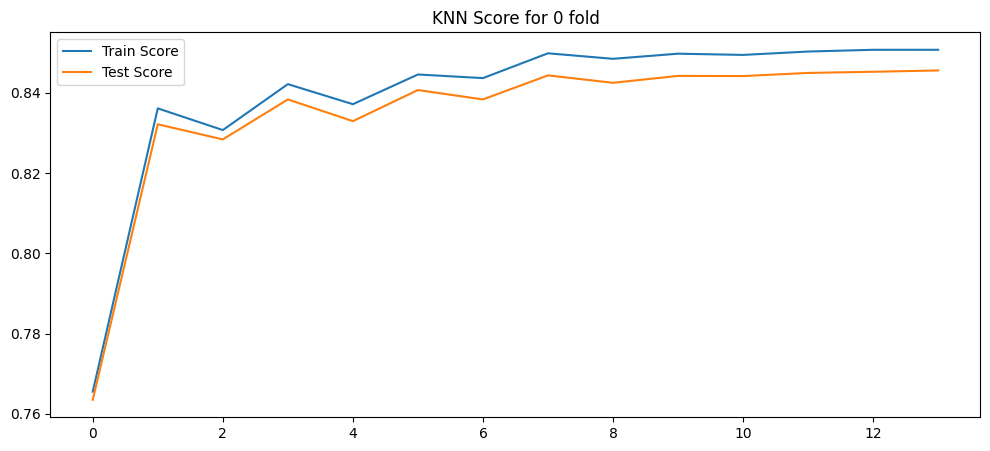

i:  1
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


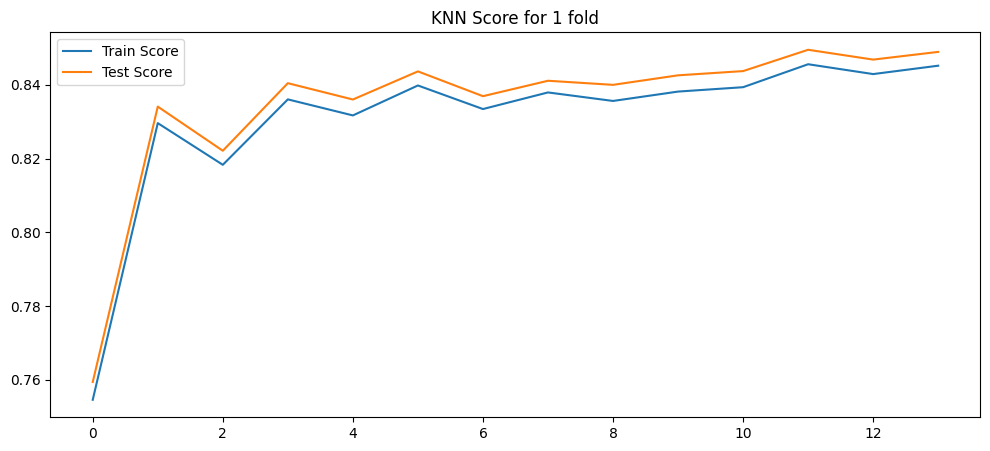

i:  2
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


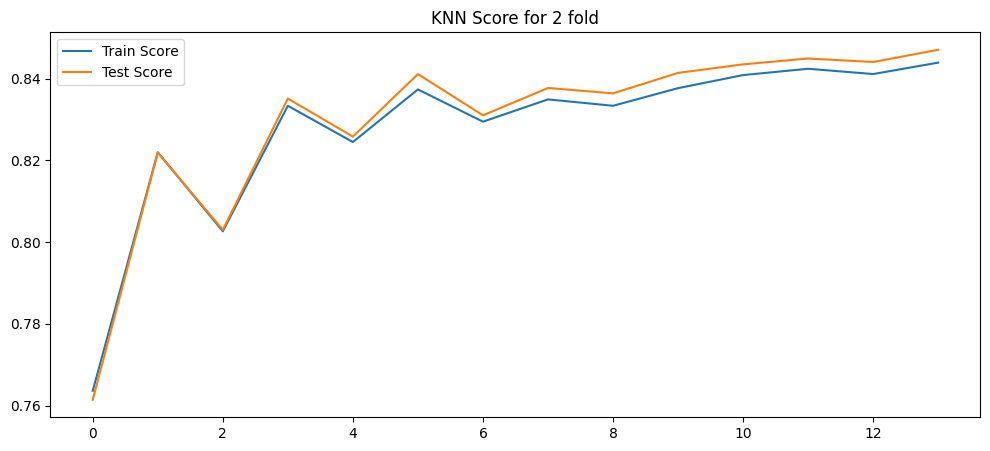

i:  3
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


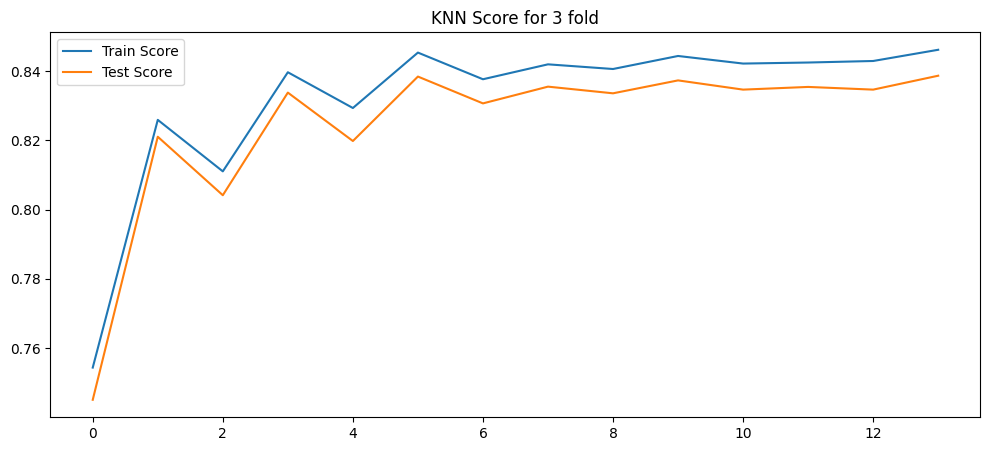

i:  4
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


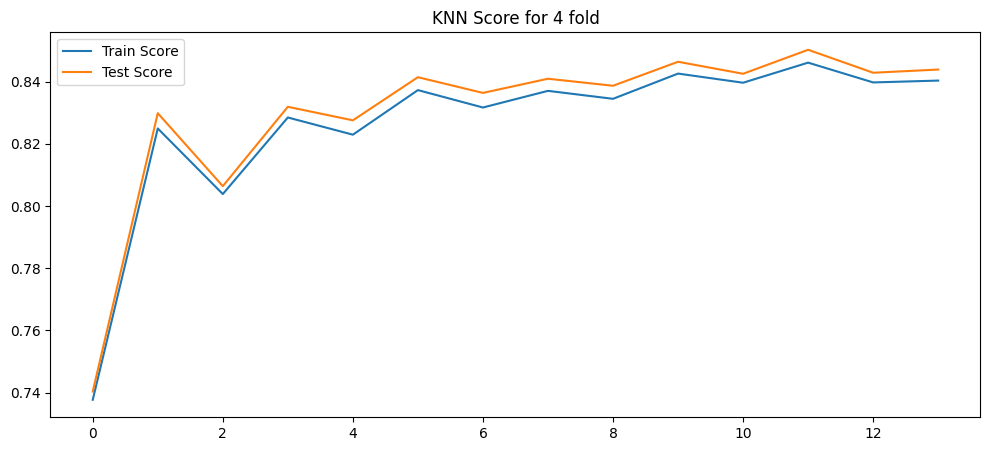

i:  5
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


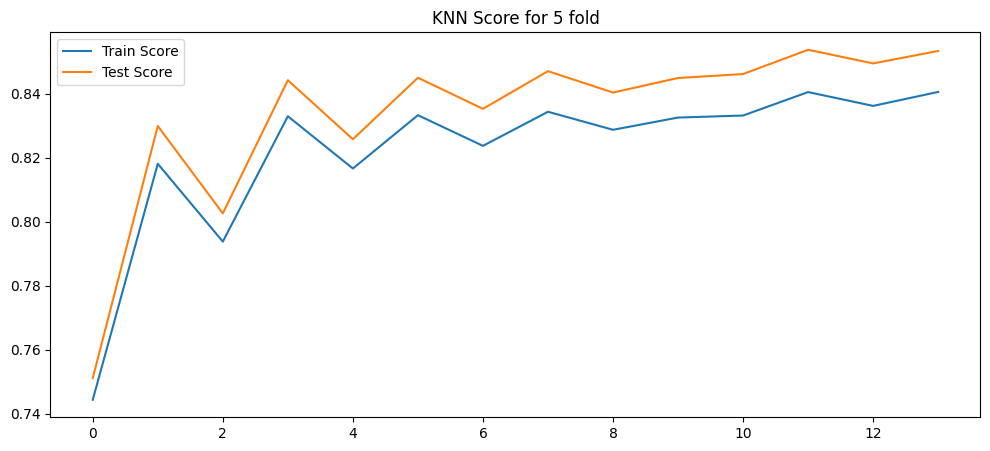

i:  6
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


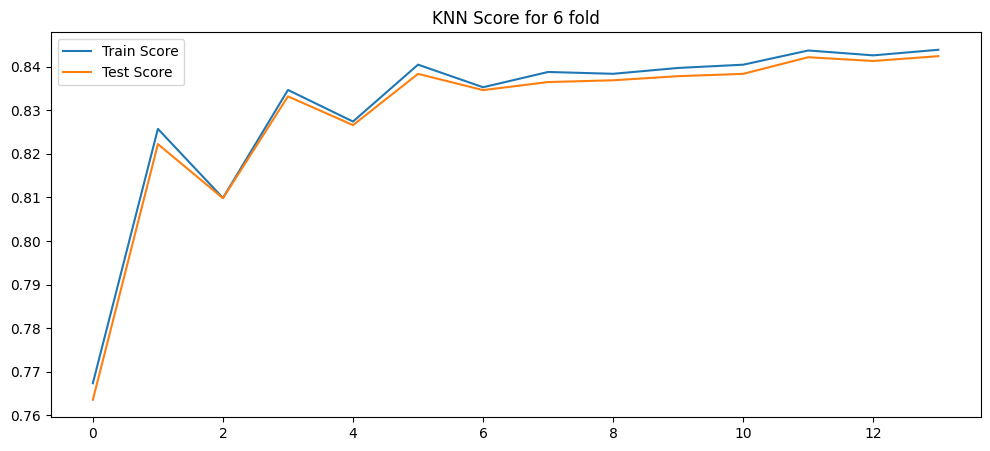

i:  7
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


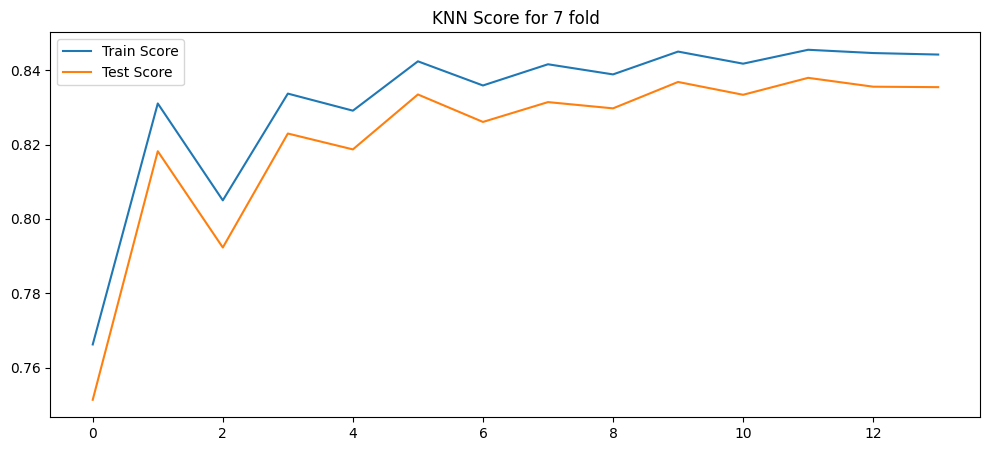

i:  8
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


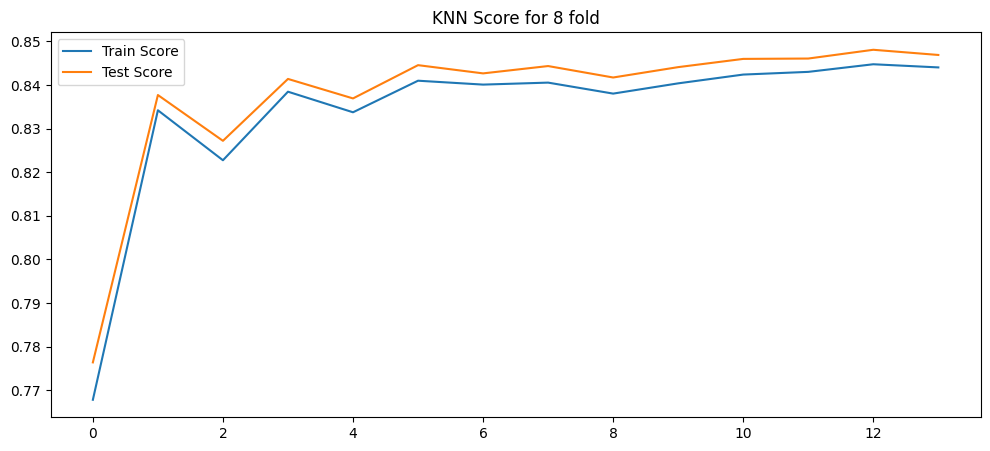

i:  9
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14


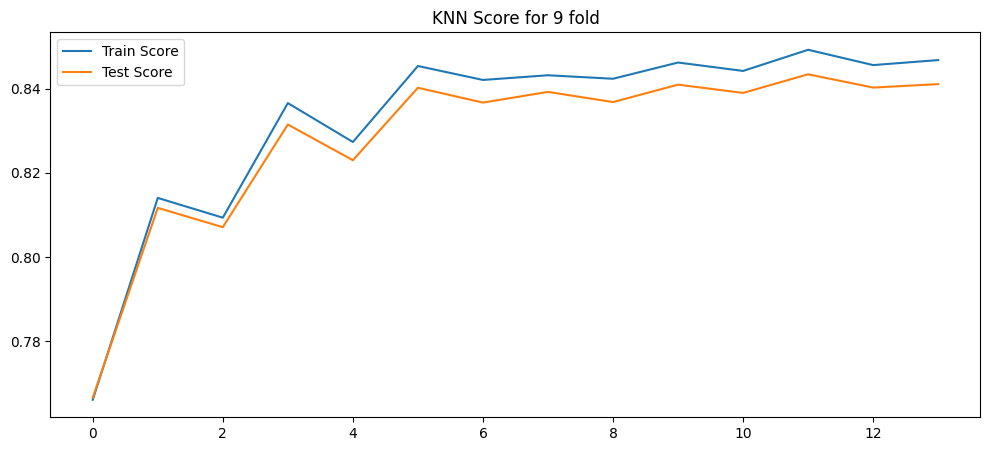

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

for i in range(10):
    print("i: ", i)
    test_score = []
    train_score = []
    
    for j in range(1,15):
        print("j: ", j)
        knn = KNeighborsClassifier(j)
        knn.fit(x_trains[i], y_trains[i])

        train_score.append(knn.score(x_trains[i], y_trains[i]))
        test_score.append(knn.score(x_tests[i], y_tests[i]))
        pass

    plt.figure(figsize=(12,5))
    p = sns.lineplot(train_score, markers='*', label='Train Score')
    p = sns.lineplot(test_score, markers='o', label='Test Score')
    plt.title(f"KNN Score for {i} fold")
    plt.show()
    pass

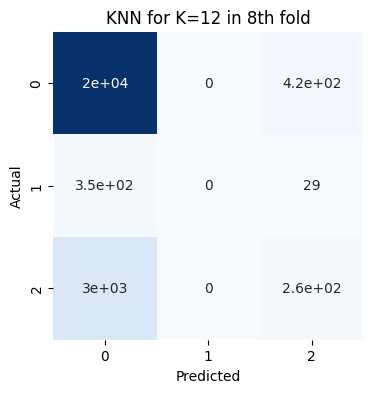

Accuracy: 0.8460812861419842
Precision 0.7822713763495417
Recall:  0.8460812861419842
F1 Score:  0.7988396038178148


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

knn = KNeighborsClassifier(12)
knn.fit(x_trains[8], y_trains[8])
score = knn.score(x_tests[8], y_tests[8])

y_pred = knn.predict(x_tests[8])

cm.append(confusion_matrix(y_tests[8], y_pred)) 
plt.figure(figsize=(4,4))
sns.heatmap(cm[0], annot=True, cbar=False, cmap="Blues")
plt.title("KNN for K=12 in 8th fold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy:" ,accuracy_score(y_tests[8], y_pred))
print("Precision", precision_score(y_tests[8], y_pred, average='weighted'))
print("Recall: ", recall_score(y_tests[8], y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_tests[8], y_pred, average='weighted'))


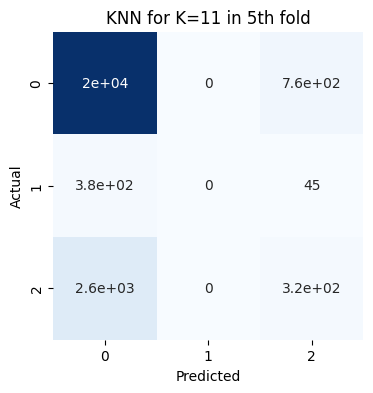

Accuracy: 0.8461222983226018
Precision 0.7884266011186222
Recall:  0.8461222983226018
F1 Score:  0.8107909902519606


c:\Users\ACER\.conda\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy = []
Precision = []
Recall = []
F1_Score = []
minAcc = -1
index = 0
cm = []
models = []

knn = KNeighborsClassifier(11)
knn.fit(x_trains[5], y_trains[5])
score = knn.score(x_tests[5], y_tests[5])

y_pred = knn.predict(x_tests[5])

cm.append(confusion_matrix(y_tests[5], y_pred)) 
plt.figure(figsize=(4,4))
sns.heatmap(cm[0], annot=True, cbar=False, cmap="Blues")
plt.title("KNN for K=11 in 5th fold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy:" ,accuracy_score(y_tests[5], y_pred))
print("Precision", precision_score(y_tests[5], y_pred, average='weighted'))
print("Recall: ", recall_score(y_tests[5], y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_tests[5], y_pred, average='weighted'))
